<a href="https://colab.research.google.com/github/ne-adrita/Predicting-Sleep-Quality-through-Behavioral-Pattern-Recognition/blob/main/LightGBm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 3999, number of used features: 12
[LightGBM] [Info] Start training from score 5.528632
📊 LightGBM Regressor Results
MAE: 2.5349062671590645
MSE: 8.873807311270003
R² Score: -0.09311611516155693
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 3999, number of used features: 12
[LightGBM] [Info] Start training from score -0.924199
[LightGBM] [Info] Start training from score -1.190478
[LightGBM] [Info] Start trai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📊 LightGBM Classifier Results
Accuracy: 0.361
Classification Report:
               precision    recall  f1-score   support

        Poor       0.40      0.52      0.45       394
     Average       0.32      0.27      0.30       310
        Good       0.31      0.24      0.27       296

    accuracy                           0.36      1000
   macro avg       0.35      0.34      0.34      1000
weighted avg       0.35      0.36      0.35      1000

Confusion Matrix:
 [[205  98  91]
 [157  84  69]
 [147  77  72]]


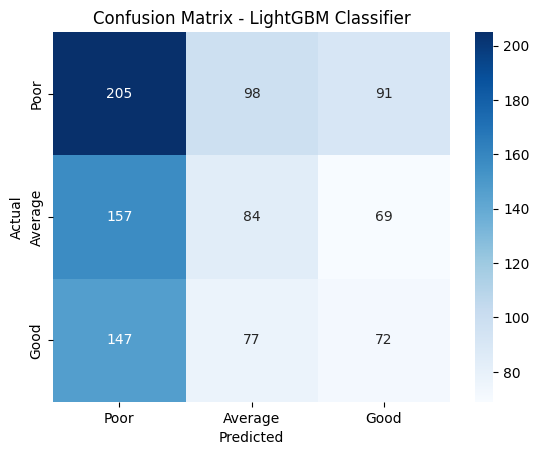

In [1]:
# 📌 Step 1: Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 2: Load & clean data
df = pd.read_csv('/content/sleep_pattern_analysis_datasett.csv')
df.drop('Person_ID', axis=1, inplace=True)
df['Work Hours (hrs/day)'] = pd.to_numeric(df['Work Hours (hrs/day)'], errors='coerce')
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.dropna(inplace=True)

# 🎯 Step 3: Features & Target
X = df.drop('Sleep Quality', axis=1)
y_reg = df['Sleep Quality']
y_class = y_reg.apply(lambda x: 0 if x <= 4 else (1 if x <= 7 else 2))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 🧠 Regressor
# -----------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

lgb_reg = lgb.LGBMRegressor(random_state=42)
lgb_reg.fit(X_train_r, y_train_r)
y_pred_r = lgb_reg.predict(X_test_r)

print("📊 LightGBM Regressor Results")
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))

# -----------------------------
# 🧠 Classifier
# -----------------------------
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train_c, y_train_c)
y_pred_c = lgb_clf.predict(X_test_c)

print("\n📊 LightGBM Classifier Results")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c, target_names=["Poor", "Average", "Good"]))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

# 🔍 Confusion Matrix Heatmap
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Poor", "Average", "Good"],
            yticklabels=["Poor", "Average", "Good"])
plt.title("Confusion Matrix - LightGBM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
